## Loading Dataset

In [0]:
import pandas as pd
import keras
from keras import models
from keras.layers import Embedding, Dense, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

# File loaded from Github Repo
train_file_path = 'https://raw.githubusercontent.com/usef-kh/HousePriceEstimation/master/Data/train.csv'
test_file_path = 'https://raw.githubusercontent.com/usef-kh/HousePriceEstimation/master/Data/test.csv'
df = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)


# frames = [df,df_test]
# df = pd.concat(frames, keys=['train', 'test'],sort=False)
# df.shape


In [376]:
# df_test.shape

(1459, 80)

## Processing Boolean Features

In [465]:
df_bool = df['CentralAir']

df_bool[df_bool == 'Y'] = 1
df_bool[df_bool == 'N'] = 0

df_bool.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1460,)

## Processing Numeric Features

In [466]:
df_numeric = df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]
df_numeric.fillna(0, inplace=True)

df_numeric.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1460, 28)

## Processing Ranking Features

In [334]:
df_ranking = df[['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']]
df_ranking.head(5)

OverallQual  OverallCond ExterQual  ... GarageCond PoolQC Fence
train 0            7            5        Gd  ...         TA    NaN   NaN
      1            6            8        TA  ...         TA    NaN   NaN
      2            7            5        Gd  ...         TA    NaN   NaN
      3            7            5        TA  ...         TA    NaN   NaN
      4            8            5        Gd  ...         TA    NaN   NaN

[5 rows x 16 columns]

## Processing Time Features

In [467]:
df_time = df[['YearBuilt','YearRemodAdd','YrSold']]

df_time.head(10)

reno_to_sale =  df_time['YrSold'].values - df_time['YearRemodAdd'].values
const_to_sale =  df_time['YrSold'].values - df_time['YearBuilt'].values

reno_to_sale[reno_to_sale < 0] = 0
const_to_sale[const_to_sale < 0] = 0



df_time.insert(2, "Renovation to Sale", reno_to_sale, True)
df_time.insert(2, "Construction to Sale", const_to_sale, True)

df_time = df_time[["Construction to Sale","Renovation to Sale"]]
df_time.shape

(1460, 2)

## Processing Categorical Features

In [199]:
df_catigorical = df[['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','GarageYrBlt','GarageFinish','PavedDrive','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']]


df_catigorical.head(10)

A = df_catigorical['YearBuilt'].unique()

print(A)
print(min(A))
print(max(A))
# scaler = MinMaxScaler()
# data_df['ScaledPrice'] = scaler.fit_transform(data_df[['SalePrice']])
# data_df.head()



# data_df['Encode'] = -1


# for i,a in enumerate(A):
#   data_df.loc[data_df.Neighborhood == a, 'Encode'] = int(i)

# data_df.head(12)
# embedding_size = 3

# model = models.Sequential()
# model.add(Embedding(input_dim = A.size, output_dim = embedding_size, input_length = 1, name="embedding"))
# model.add(Flatten())
# model.add(Dense(50, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(1))
# model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
# model.fit(x = data_df['Encode'].as_matrix(), y=data_df['ScaledPrice'].as_matrix() , epochs = 50, batch_size = 4)

# layer = model.get_layer('embedding')
# output_embeddings = layer.get_weights()
# output_embeddings

# output_embeddings_df = pd.DataFrame(output_embeddings[0])
# output_embeddings_df = output_embeddings_df.reset_index()
# output_embeddings_df.columns = ['Neighborhood', 'embedding_1', 'embedding_2', 'embedding_3']#,'embedding_4', 'embedding_5', 'embedding_6']
# output_embeddings_df

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
1872
2010


## Training Network

In [0]:
from sklearn import preprocessing
import numpy as np


df_taining = pd.concat([df_numeric,df_time,df_bool, df[['SalePrice']]], axis=1)

scaler = preprocessing.MinMaxScaler().fit(df_taining)

train_data = scaler.transform(df_taining)

x_train = train_data[:,0:-1]
y_train = train_data[:,-1]


In [492]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
# print('------------')
# print(test_data.shape)
# print(test_target.shape)

(1460, 31)
(1460,)
(1459, 31)


In [493]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',
          loss='mse',
          metrics=['mse'])

model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 64)                2048      
_________________________________________________________________
dense_143 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 65        
Total params: 6,273
Trainable params: 6,273
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,
              y_train,
              epochs=500,
              batch_size=128,
              validation_split=0.3,
              verbose=0)

Minimum Validation Loss is:0.0021090340882259717
Epoch: 255


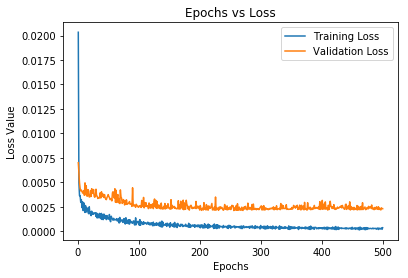

In [495]:
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  print('Minimum Validation Loss is:' + str(min(val_loss)))
  print('Epoch: ' + str(val_loss.index(min(val_loss))))
  
loss_curve(history)

In [0]:
results = (model.predict(x_test)*ystd)+ymean

In [0]:
pd.DataFrame(results).to_csv("file.csv")

## Attempting K-Fold Validation

In [0]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [119]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 1
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [120]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [0.0465231002091545, 0.040386852132130974, 0.03962960404484239, 0.04446740938376074]
mean all scores : 0.042751741442472145


In [0]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)